# F1 1950-2020 data

## Context
FIA F1 - Formula 1 is a Cutthroat motorsport competition started since 1950 and continues till date and attracts more and more fans every year towards this heritage sport.

I have included the race wins for years 1950-2019 and will add more and recent data shortly.

The dataset is prepared by Aadil Tajani

Dataset Link : https://www.kaggle.com/aadiltajani/fia-f1-19502019-data

1 - Import libraries I used for visualization

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
from pandas.plotting import table
%matplotlib inline

2 - Define dataframe after loading all values from cv file and assigning them to it

In [85]:
file_location_url = "files/f1_races_1950-2019.csv";

f1_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

In [86]:
row_count = f1_df.shape[0]
column_count = f1_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 1021 , Column : 8


3 - Show first 5 values of dataframe

In [87]:
f1_df.head()

,Unnamed: 0,Venue,Date,Name,NameTag,Team,Laps,Time
0,0,Great Britain,13 May 1950,Nino Farina,FAR,Alfa Romeo,70.0,2:13:23.600
1,1,Monaco,21 May 1950,Juan Manuel Fangio,FAN,Alfa Romeo,100.0,3:13:18.700
2,2,Indianapolis 500,30 May 1950,Johnnie Parsons,PAR,Kurtis Kraft Offenhauser,138.0,2:46:55.970
3,3,Switzerland,04 Jun 1950,Nino Farina,FAR,Alfa Romeo,42.0,2:02:53.700
4,4,Belgium,18 Jun 1950,Juan Manuel Fangio,FAN,Alfa Romeo,35.0,2:47:26.000


4 - Show last 5 values of dataframe

In [88]:
f1_df.tail()

,Unnamed: 0,Venue,Date,Name,NameTag,Team,Laps,Time
1016,1016,Japan,13 Oct 2019,Valtteri Bottas,BOT,Mercedes,52.0,1:21:46.755
1017,1017,Mexico,27 Oct 2019,Lewis Hamilton,HAM,Mercedes,71.0,1:36:48.904
1018,1018,United States,03 Nov 2019,Valtteri Bottas,BOT,Mercedes,56.0,1:33:55.653
1019,1019,Brazil,17 Nov 2019,Max Verstappen,VER,Red Bull Racing Honda,71.0,1:33:14.678
1020,1020,Abu Dhabi,01 Dec 2019,Lewis Hamilton,HAM,Mercedes,55.0,1:34:05.715


5 - Show each column information of dataframe

In [89]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1021 non-null   int64  
 1   Venue       1021 non-null   object 
 2   Date        1021 non-null   object 
 3   Name        1021 non-null   object 
 4   NameTag     1021 non-null   object 
 5   Team        1021 non-null   object 
 6   Laps        1018 non-null   float64
 7   Time        1018 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.9+ KB


6 - Show how many variables there are in dataframe

In [90]:
f1_df.count()

Unnamed: 0    1021
Venue         1021
Date          1021
Name          1021
NameTag       1021
Team          1021
Laps          1018
Time          1018
dtype: int64

7 - Show descriptive statistics of dataframe

In [91]:
f1_df.describe()

,Unnamed: 0,Laps
count,1021.000000,1018.000000
mean,510.000000,65.115914
std,294.881615,20.810668
min,0.000000,12.000000
25%,255.000000,54.000000
50%,510.000000,65.000000
75%,765.000000,75.000000
max,1020.000000,200.000000


8 - Determine if null values of each column are in a dataframe

In [92]:
f1_df.isnull().sum()

Unnamed: 0    0
Venue         0
Date          0
Name          0
NameTag       0
Team          0
Laps          3
Time          3
dtype: int64

9 - Show rows having null values in dataframe

In [93]:
f1_df[f1_df["Laps"].isnull() | f1_df["Time"].isnull()]

,Unnamed: 0,Venue,Date,Name,NameTag,Team,Laps,Time
11,11,France,01 Jul 1951,Luigi Fagioli,FAG,Alfa Romeo,NaN,NaN
49,49,Argentina,22 Jan 1956,Luigi Musso,MUS,Ferrari,NaN,NaN
63,63,Great Britain,20 Jul 1957,Tony Brooks,BRO,Vanwall,NaN,NaN


10 - Change 'Unnamed: 0' with 'id'

In [94]:
f1_df.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [95]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1021 non-null   int64  
 1   Venue    1021 non-null   object 
 2   Date     1021 non-null   object 
 3   Name     1021 non-null   object 
 4   NameTag  1021 non-null   object 
 5   Team     1021 non-null   object 
 6   Laps     1018 non-null   float64
 7   Time     1018 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.9+ KB


11 - Remove the values including Indianapolis 500 in Venue from dataframe 

In [96]:
f1_df = f1_df[f1_df["Venue"] != "Indianapolis 500"]

12 - Create a Year Column in dataframe 

In [97]:
f1_df['year'] = f1_df['Date'].apply(lambda x : x.lstrip().split(' ')[-1])

In [98]:
f1_df.head()

,id,Venue,Date,Name,NameTag,Team,Laps,Time,year
0,0,Great Britain,13 May 1950,Nino Farina,FAR,Alfa Romeo,70.0,2:13:23.600,1950
1,1,Monaco,21 May 1950,Juan Manuel Fangio,FAN,Alfa Romeo,100.0,3:13:18.700,1950
3,3,Switzerland,04 Jun 1950,Nino Farina,FAR,Alfa Romeo,42.0,2:02:53.700,1950
4,4,Belgium,18 Jun 1950,Juan Manuel Fangio,FAN,Alfa Romeo,35.0,2:47:26.000,1950
5,5,France,02 Jul 1950,Juan Manuel Fangio,FAN,Alfa Romeo,64.0,2:57:52.800,1950


13 - Solve Encoding issue in Name column of dataframe

In [99]:
f1_df[f1_df["Name"].str.contains("Kimi", case=False)]

,id,Venue,Date,Name,NameTag,Team,Laps,Time,year
701,701,Malaysia,23 Mar 2003,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,56.0,1:32:22.195,2003
729,729,Belgium,29 Aug 2004,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,44.0,1:32:35.274,2004
738,738,Spain,08 May 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,66.0,1:27:16.830,2005
739,739,Monaco,22 May 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,78.0,1:45:15.556,2005
741,741,Canada,12 Jun 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,70.0,1:32:09.290,2005
746,746,Hungary,31 Jul 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,70.0,1:37:25.552,2005
747,747,Turkey,21 Aug 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,58.0,1:24:34.454,2005
749,749,Belgium,11 Sep 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,44.0,1:30:01.295,2005
751,751,Japan,09 Oct 2005,Kimi RÃ¤ikkÃ¶nen,RAI,McLaren Mercedes,53.0,1:29:02.212,2005
771,771,Australia,18 Mar 2007,Kimi RÃ¤ikkÃ¶nen,RAI,Ferrari,58.0,1:25:28.770,2007


In [100]:
f1_df["Name"] = f1_df["Name"].str.replace('RÃ¤ikkÃ¶nen','Räikkönen')

In [101]:
f1_df[f1_df["Name"].str.contains("Kimi", case=False)]

,id,Venue,Date,Name,NameTag,Team,Laps,Time,year
701,701,Malaysia,23 Mar 2003,Kimi Räikkönen,RAI,McLaren Mercedes,56.0,1:32:22.195,2003
729,729,Belgium,29 Aug 2004,Kimi Räikkönen,RAI,McLaren Mercedes,44.0,1:32:35.274,2004
738,738,Spain,08 May 2005,Kimi Räikkönen,RAI,McLaren Mercedes,66.0,1:27:16.830,2005
739,739,Monaco,22 May 2005,Kimi Räikkönen,RAI,McLaren Mercedes,78.0,1:45:15.556,2005
741,741,Canada,12 Jun 2005,Kimi Räikkönen,RAI,McLaren Mercedes,70.0,1:32:09.290,2005
746,746,Hungary,31 Jul 2005,Kimi Räikkönen,RAI,McLaren Mercedes,70.0,1:37:25.552,2005
747,747,Turkey,21 Aug 2005,Kimi Räikkönen,RAI,McLaren Mercedes,58.0,1:24:34.454,2005
749,749,Belgium,11 Sep 2005,Kimi Räikkönen,RAI,McLaren Mercedes,44.0,1:30:01.295,2005
751,751,Japan,09 Oct 2005,Kimi Räikkönen,RAI,McLaren Mercedes,53.0,1:29:02.212,2005
771,771,Australia,18 Mar 2007,Kimi Räikkönen,RAI,Ferrari,58.0,1:25:28.770,2007


14 - Draw a Figure to show which top 30 years more races were held

In [102]:
f1_df_race = f1_df.groupby(['year'])['id'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(30)

In [103]:
f1_df_race = f1_df_race.reset_index()

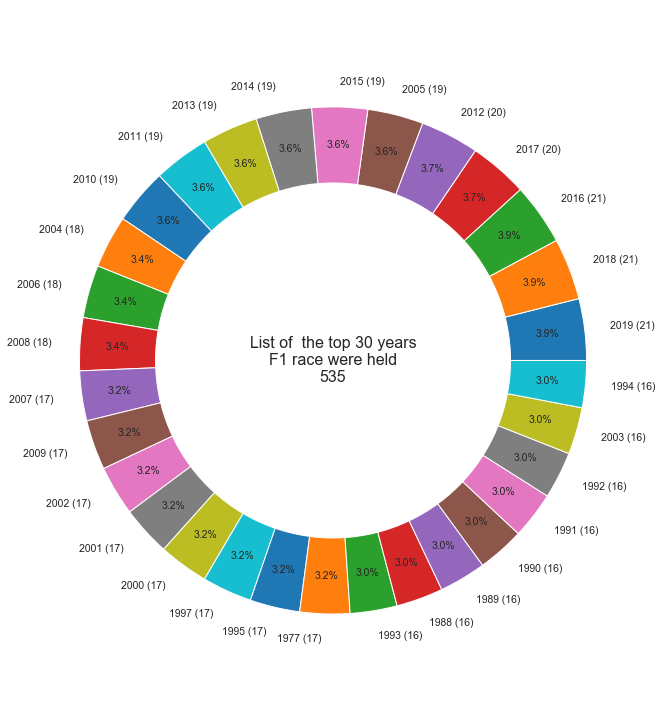

In [104]:
plt.figure(figsize=(10,13))
ax = subplot_kw=dict(aspect="equal")
my_circle = plt.Circle((0, 0), 0.7, color='white')

labels = [f1_df_race['year'][i] +" (" + str(f1_df_race['count'][i]) +") "  for i in range(f1_df_race.shape[0])]

d = plt.pie(f1_df_race['count'], labels= labels,
            autopct='%1.1f%%',
            pctdistance=0.85, 
            labeldistance=1.1,
            textprops = {'fontsize':10.5})

plt.axis('equal')
plt.gca().add_artist(my_circle)

plt.text(0, 
         0, 
         "List of "+ ' the top 30 years\n' + "F1 race were held\n"+str(f1_df_race['count'].sum()),
         horizontalalignment='center',
         verticalalignment='center',
         size=16,
        )
plt.savefig('images/image1.png')  
plt.show()

15 - Draw a Figure to show the top 10 winning f1 drivers

In [105]:
f1_df_top_10_winners = pd.DataFrame({'count' : f1_df.groupby(['year','Name']).size()}).reset_index()

In [106]:
f1_df_top_10_winners = f1_df_top_10_winners.sort_values(['count'], ascending = False)

In [107]:
f1_df_top_10_winners.drop('year', axis=1, inplace=True)

In [108]:
f1_df_top_10_winners = f1_df_top_10_winners.groupby(['Name'])['count'].sum().reset_index()

In [109]:
f1_df_top_10_winners = f1_df_top_10_winners.sort_values(['count'], ascending = False).head(10)

In [110]:
data = [go.Bar(
            x = f1_df_top_10_winners["Name"],
            y = f1_df_top_10_winners["count"],
            marker= dict(colorscale='RdBu',
                         color = f1_df_top_10_winners.index.values
                        ),
            text='Winner counts'
    )]

layout = go.Layout(
    title='Top 10 Driver Name With The Most Wins'
)

fig = go.Figure(data=data, layout=layout)
pio.write_image(fig, "images/image2.png")
fig.show()

16 - Draw a Figure to show the top 10 Driver Team With The Most Wins

In [111]:
f1_df_top_10_driver_team = pd.DataFrame({'count' : f1_df.groupby(['year','Team']).size()}).reset_index()

In [112]:
f1_df_top_10_driver_team = f1_df_top_10_driver_team.sort_values(['count'], ascending = False)

In [113]:
f1_df_top_10_driver_team.drop('year', axis=1, inplace=True)

In [114]:
f1_df_top_10_driver_team = f1_df_top_10_driver_team.groupby(['Team'])['count'].sum().reset_index()

In [115]:
f1_df_top_10_driver_team = f1_df_top_10_driver_team.sort_values(['count'], ascending = False).head(10)

In [116]:
f1_df_top_10_driver_team

,Team,count
14,Ferrari,239
34,Mercedes,93
32,McLaren Mercedes,78
52,Williams Renault,64
24,Lotus Ford,47
31,McLaren Honda,44
30,McLaren Ford,35
40,Red Bull Racing Renault,35
42,Renault,35
33,McLaren TAG,25


In [117]:
trace=go.Pie(labels=f1_df_top_10_driver_team["Team"], 
             values=f1_df_top_10_driver_team["count"],
             pull=[0.05]
            )

layout = go.Layout(title="Top 10 Driver Team With The Most Wins", 
                   height=400, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=500, width=700)
pio.write_image(fig, "images/image3.png")
fig.show()

17 - Draw a Figure to show top 10 maximum Number of Laps

In [118]:
f1_df_top_10_laps = f1_df[["Venue","Laps","year"]]

In [119]:
f1_df_top_10_laps

,Venue,Laps,year
0,Great Britain,70.0,1950
1,Monaco,100.0,1950
3,Switzerland,42.0,1950
4,Belgium,35.0,1950
5,France,64.0,1950
...,...,...,...
1016,Japan,52.0,2019
1017,Mexico,71.0,2019
1018,United States,56.0,2019
1019,Brazil,71.0,2019


In [120]:
len(f1_df_top_10_laps)

1010

In [121]:
f1_df_top_10_laps.drop_duplicates(subset=['Venue', 'Laps'],keep=False,inplace=True) 

C:\Users\Noyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
len(f1_df_top_10_laps)

111

In [123]:
f1_df_top_10_laps = f1_df_top_10_laps.sort_values(['Laps'], ascending = False).head(10)

In [124]:
f1_df_top_10_laps

,Venue,Laps,year
130,Austria,105.0,1964
59,Monaco,105.0,1957
55,Great Britain,101.0,1956
58,Argentina,100.0,1957
46,Netherlands,100.0,1955
50,Argentina,98.0,1956
24,Argentina,97.0,1953
211,Argentina,95.0,1972
33,Argentina,87.0,1954
66,Italy,87.0,1957


In [125]:
f1_df_top_10_laps['Venue'] = f1_df_top_10_laps['Venue'] + ' ' + f1_df_top_10_laps['year']

In [126]:
f1_df_top_10_laps.drop('year', axis=1, inplace=True)

In [127]:
f1_df_top_10_laps = f1_df_top_10_laps.sort_values(['Laps'], ascending = True)

In [128]:
trace1 = go.Bar(y=f1_df_top_10_laps["Venue"], 
                x=f1_df_top_10_laps["Laps"], 
                orientation="h", 
                marker= dict(colorscale='RdBu',
                         color = f1_df_top_10_winners.index.values
                        )
               )

data1 = [trace1]
layout = go.Layout(title="Top 10 maximum Number of Laps in Race", 
                   legend=dict(x=0.1, y=1.1, orientation="h")
                  )
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image4.png")
fig.show()

18 - Draw a Figure to show top 10 f1 drivers with the shortest Race Time in all time

In [129]:
f1_df_top_10_race_time = f1_df.copy()

In [130]:
len(f1_df_top_10_race_time)

1010

In [131]:
f1_df_top_10_race_time.dropna(subset=['Time'],inplace=True)

In [132]:
len(f1_df_top_10_race_time)

1007

In [133]:
d1 = pd.to_datetime(f1_df_top_10_race_time['Time'], format='%H:%M:%S.%f', errors='coerce')
d2 = pd.to_datetime(f1_df_top_10_race_time['Time'], format='%M:%S.%f', errors='coerce')
d3 = pd.to_datetime(f1_df_top_10_race_time['Time'], format='%S.%f', errors='coerce')

In [134]:
d = d1.fillna(d2).fillna(d3)

In [135]:
d[d.isna()]

Series([], Name: Time, dtype: datetime64[ns])

In [136]:
d

0      1900-01-01 02:13:23.600
1      1900-01-01 03:13:18.700
3      1900-01-01 02:02:53.700
4      1900-01-01 02:47:26.000
5      1900-01-01 02:57:52.800
                 ...          
1016   1900-01-01 01:21:46.755
1017   1900-01-01 01:36:48.904
1018   1900-01-01 01:33:55.653
1019   1900-01-01 01:33:14.678
1020   1900-01-01 01:34:05.715
Name: Time, Length: 1007, dtype: datetime64[ns]

In [137]:
d.argsort()

0       504
1       242
3       793
4       250
5       382
       ... 
1016     10
1017     53
1018     47
1019     32
1020    834
Name: Time, Length: 1007, dtype: int64

In [138]:
f1_df_top_10_race_time.iloc[504]

id                   518
Venue          Australia
Date         03 Nov 1991
Name        Ayrton Senna
NameTag              SEN
Team       McLaren Honda
Laps                  14
Time           24:34.899
year                1991
Name: 518, dtype: object

In [139]:
f1_df_top_10_race_time = f1_df_top_10_race_time.iloc[d.argsort()]

In [140]:
f1_df_top_10_race_time = f1_df_top_10_race_time.head(10)

In [141]:
f1_df_top_10_race_time = f1_df_top_10_race_time[["Name","Time"]]

In [142]:
f1_df_top_10_race_time['Name'] = f1_df_top_10_race_time['Name'] + ' ' + f1_df_top_10_race_time['Time']

In [143]:
f1_df_top_10_race_time

,Name,Time
518,Ayrton Senna 24:34.899,24:34.899
256,Jochen Mass 42:53.700,42:53.700
807,Jenson Button 55:30.622,55:30.622
264,Vittorio Brambilla 57:56.690,57:56.690
396,Alain Prost 1:01:07.740,1:01:07.740
313,Niki Lauda 1:07:04.540,1:07:04.540
679,Michael Schumacher 1:08:05.002,1:08:05.002
713,Michael Schumacher 1:14:19.838,1:14:19.838
748,Juan Pablo Montoya 1:14:28.659,1:14:28.659
449,Nelson Piquet 1:14:47.707,1:14:47.707


In [144]:
f1_df_top_10_race_time['Order'] = [i for i in range(1,11)]

In [145]:
f1_df_top_10_race_time

,Name,Time,Order
518,Ayrton Senna 24:34.899,24:34.899,1
256,Jochen Mass 42:53.700,42:53.700,2
807,Jenson Button 55:30.622,55:30.622,3
264,Vittorio Brambilla 57:56.690,57:56.690,4
396,Alain Prost 1:01:07.740,1:01:07.740,5
313,Niki Lauda 1:07:04.540,1:07:04.540,6
679,Michael Schumacher 1:08:05.002,1:08:05.002,7
713,Michael Schumacher 1:14:19.838,1:14:19.838,8
748,Juan Pablo Montoya 1:14:28.659,1:14:28.659,9
449,Nelson Piquet 1:14:47.707,1:14:47.707,10


In [146]:
data = [go.Bar(
            x = f1_df_top_10_race_time["Name"],
            y = f1_df_top_10_race_time["Order"],
            marker= dict(colorscale='RdBu',
                         color = f1_df_top_10_race_time["Order"].values
                        ),
            text='Winner with the shortest Race time'
    )]

layout = go.Layout(
    title='Top 10 f1 drivers with the shortest Race time in all time',
    xaxis_tickangle=-45
)

fig = go.Figure(data=data, layout=layout)
pio.write_image(fig, "images/image5.png")
fig.show()

19 - Draw a Figure to show Most wins per season

In [147]:
f1_df_win_season = pd.DataFrame({'count' : f1_df.groupby(['year','Name']).size()}).reset_index()

In [148]:
#f1_df_win_season = f1_df_win_season.groupby(['year','Name']).agg({'count':sum})
#f1_df_win_season = f1_df_win_season.set_index(['year','Name'])
f1_df_win_season = f1_df_win_season.sort_values(['year','count'], ascending=[True,False]).set_index(['year','Name'])

In [149]:
#f1_df_win_season = f1_df_win_season.style.background_gradient(cmap='YlOrRd')

In [150]:
len(f1_df_win_season)

366

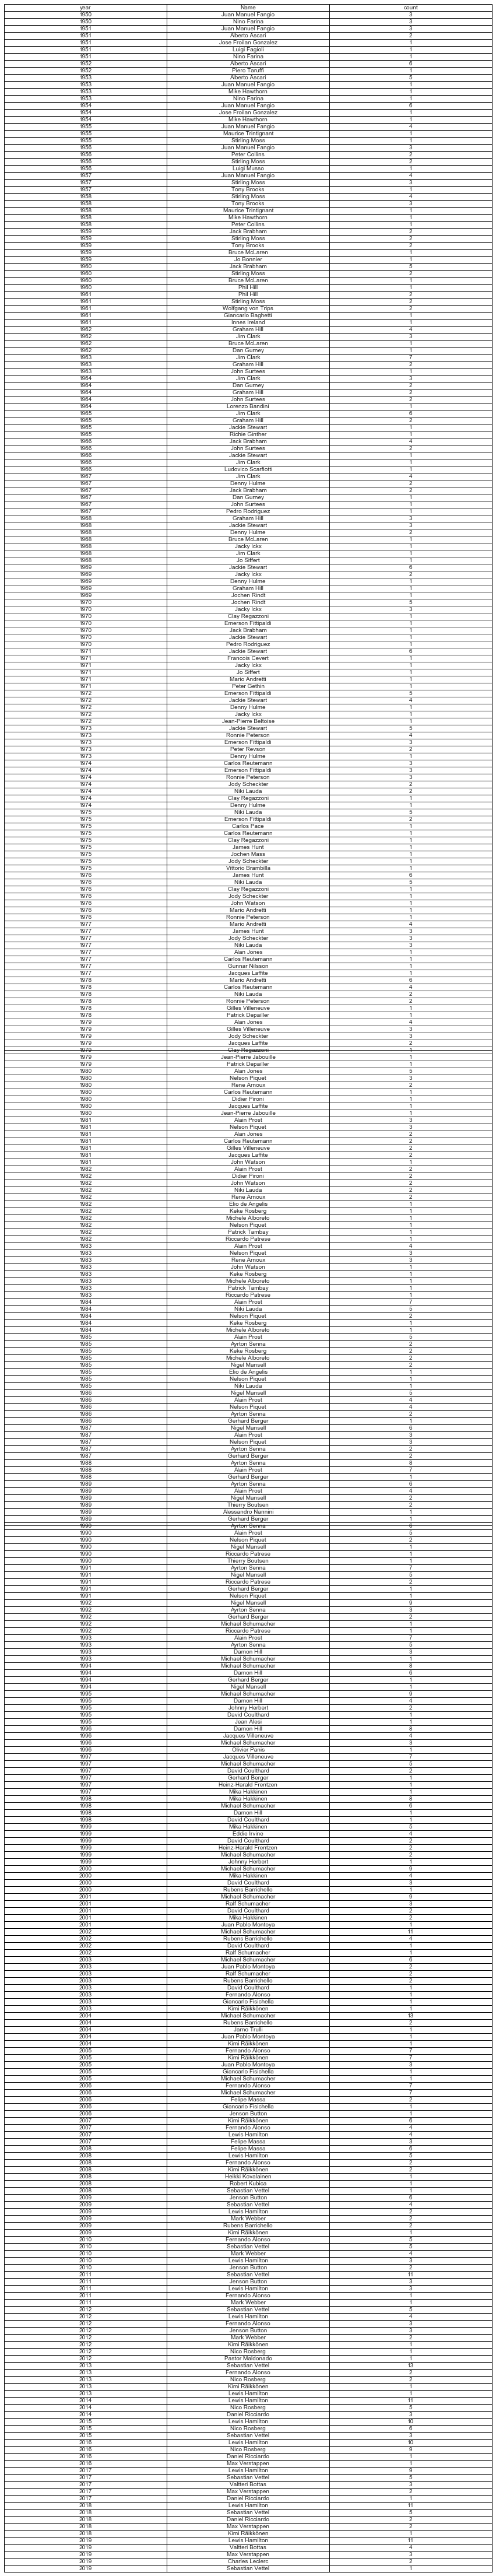

In [151]:
plt.figure(figsize=[15, 15])
ax = plt.subplot()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.table(cellText=f1_df_win_season.reset_index().values,
        colLabels=f1_df_win_season.reset_index().columns,
        loc='center',
        cellLoc='center')
plt.savefig('images/image6.png',bbox_inches="tight")

20 - Draw a WordCloud

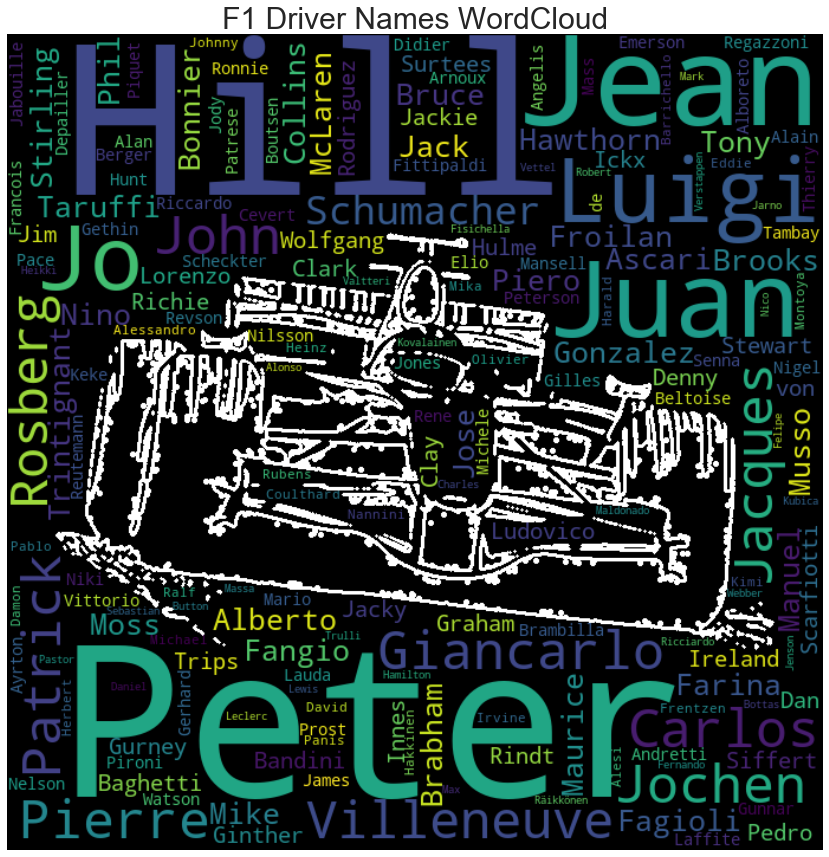

In [152]:
plt.figure(figsize=[15, 15])

image = Image.open("images/f1_car_1.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(f1_df['Name'].unique()))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('F1 Driver Names WordCloud',fontsize = 30)
plt.savefig('images/image7.png')
plt.show()

21 - Design Timeline to show driver teams With The Wins

In [153]:
f1_df_driver_team = pd.DataFrame({'count' : f1_df.groupby(['year','Team']).size()}).reset_index()

In [154]:
f1_df_driver_team

,year,Team,count
0,1950,Alfa Romeo,6
1,1951,Alfa Romeo,5
2,1951,Ferrari,3
3,1952,Ferrari,7
4,1953,Ferrari,7
...,...,...,...
245,2018,Mercedes,11
246,2018,Red Bull Racing TAG Heuer,4
247,2019,Ferrari,3
248,2019,Mercedes,15


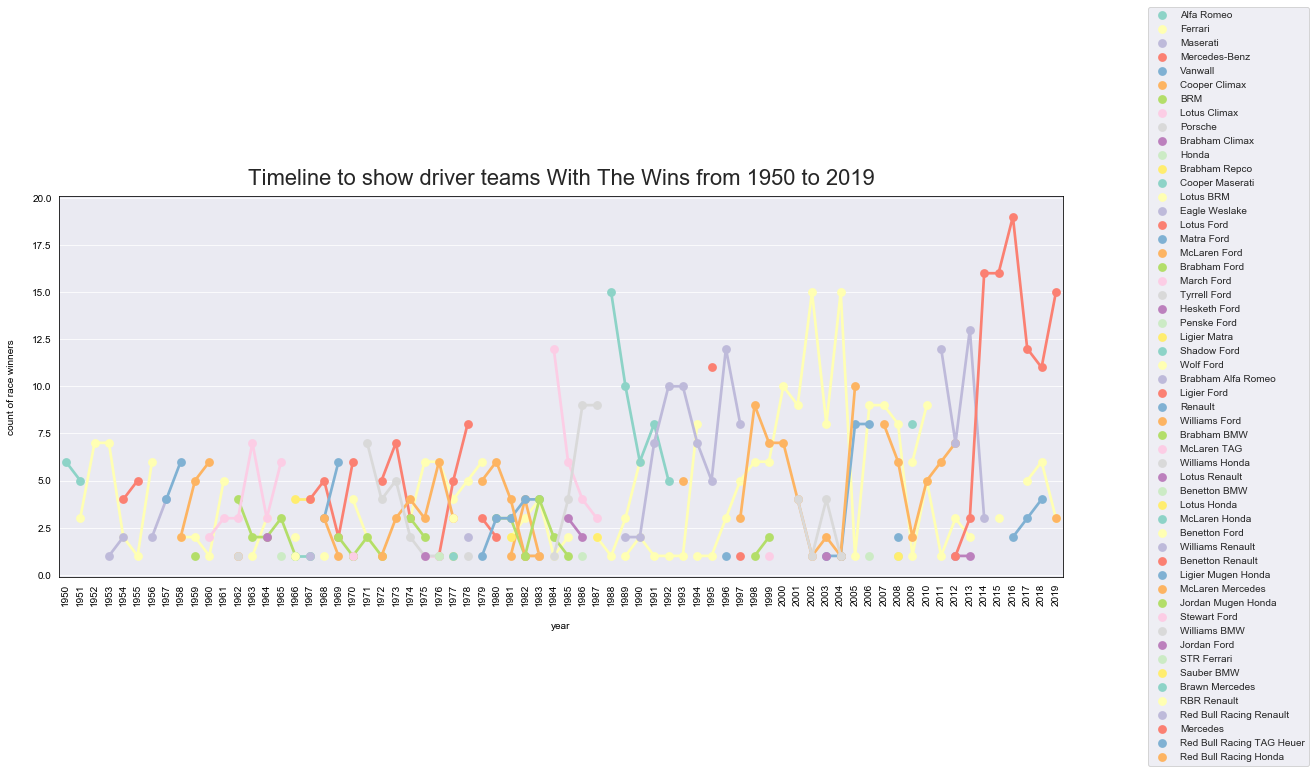

In [168]:
plt.figure(figsize=(18,7))

custom_style = {'axes.labelcolor': 'black',
                'axes.edgecolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black',
                'legend.frameon':True
               }

sns.set_style("darkgrid", rc=custom_style)

ax = sns.pointplot(data = f1_df_driver_team, 
                   x='year', 
                   y='count', 
                   hue='Team', 
                   palette="Set3",
                   facet_kws={"legend_out": True}
                  )
plt.title('Timeline to show driver teams With The Wins from 1950 to 2019', fontsize=22, y=1.015)
plt.xlabel('year', labelpad=16)
plt.ylabel('count of race winners', labelpad=16)
leg = ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=90);
plt.savefig('images/image8.png', bbox_inches='tight')
plt.show()

22 - Top 20 Drivers with the Most Races all along his career

In [156]:
file_location_url = "files/f1_race_results_1950-2020.csv";

f1_result_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

In [157]:
f1_result_df["Name"] = f1_result_df["Name"].str.replace('RÃ¤ikkÃ¶nen','Räikkönen')

In [158]:
f1_result_df[f1_result_df["Name"].str.contains("Kimi", case=False)]

,Unnamed: 0,Year,Position,Driver No.,Venue,Name,NameTag,Team,Laps,Time,Points
15297,15297,2001,6,17,australia,Kimi Räikkönen,RAI,Sauber Petronas,58.0,+84.143s,1.0
15335,15335,2001,NC,17,malaysia,Kimi Räikkönen,RAI,Sauber Petronas,0.0,DNF,0.0
15347,15347,2001,NC,17,brazil,Kimi Räikkönen,RAI,Sauber Petronas,55.0,DNF,0.0
15377,15377,2001,NC,17,san-marino,Kimi Räikkönen,RAI,Sauber Petronas,17.0,DNF,0.0
15387,15387,2001,8,17,spain,Kimi Räikkönen,RAI,Sauber Petronas,65.0,+79.808s,0.0
...,...,...,...,...,...,...,...,...,...,...,...
22753,22753,2019,NC,7,mexico,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,58.0,DNF,0.0
22765,22765,2019,11,7,united-states,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,55.0,+1 lap,0.0
22778,22778,2019,4,7,brazil,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,71.0,+9.452s,12.0
22807,22807,2019,13,7,abu-dhabi,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,54.0,+1 lap,0.0


In [159]:
f1_df_top_20_drivers = pd.DataFrame({'count' : f1_result_df.groupby(['Year','Name']).size()}).reset_index()

In [160]:
f1_df_top_20_drivers

,Year,Name,count
0,1950,Alberto Ascari,5
1,1950,Bayliss Levrett,1
2,1950,Bill Cantrell,1
3,1950,Bill Holland,1
4,1950,Bill Schindler,1
...,...,...,...
2943,2020,Pierre Gasly,1
2944,2020,Romain Grosjean,1
2945,2020,Sebastian Vettel,1
2946,2020,Sergio Perez,1


In [161]:
f1_df_top_20_drivers = f1_df_top_20_drivers.sort_values(['count'], ascending = False)

In [162]:
f1_df_top_20_drivers.drop('Year', axis=1, inplace=True)

In [163]:
f1_df_top_20_drivers = f1_df_top_20_drivers.groupby(['Name'])['count'].sum().reset_index()

In [164]:
f1_df_top_20_drivers = f1_df_top_20_drivers.sort_values(['count'], ascending = False).head(20)

In [165]:
f1_df_top_20_drivers = f1_df_top_20_drivers[::-1] # reverse sort

In [166]:
trace1 = go.Bar(y=f1_df_top_20_drivers["Name"], 
                x=f1_df_top_20_drivers["count"], 
                orientation="h", 
                marker= dict(colorscale='RdBu',
                         color = f1_df_top_20_drivers.index.values
                        )
               )

data1 = [trace1]
layout = go.Layout(title="Top 20 Drivers with the Most Races all along his career", 
                   legend=dict(x=0.1, y=1.1, orientation="h")
                  )
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image9.png")
fig.show()